In [381]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as figureFactory
import plotly.graph_objects as graphObject
import plotly.express as px


from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score





In [398]:
# Load the processed data set of the cleveland database
DF_1 = pd.read_csv("C:/Temp/AIFiles/processed.cleveland.csv", names = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [399]:
# summerise  top and bottom part of the data set and check total counts are matching with original data
DF_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [400]:
print(DF_1.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [401]:
# Check for missing values
print(DF_1.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [402]:
DF_1.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [403]:
DF_1 = DF_1.replace("?", np.nan) 
DF_1 = DF_1.dropna() 
print(DF_1)




      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0   

In [404]:
DF_1 = DF_1.replace("?", np.nan) 
DF_1 = DF_1.dropna() 
print(DF_1)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0   

In [405]:
DF_1.loc[DF_1['num'] > 0, 'num'] = 1
DF_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [406]:
DF_1['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [407]:
DF_1.ca.value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [408]:
print(DF_1.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.461279  
std      0.994914   22.941562 

In [409]:
DF_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [410]:
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


C_DF = DF_1[CATEGORICAL_COLS]
N_DF = DF_1[NUMERICAL_COLS]

In [411]:
# --- Descriptive Statistics ---
N_DF.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,297.000000,54.542088,9.049736,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,297.000000,131.693603,17.762806,94.000000,120.000000,130.000000,140.000000,200.000000
chol,297.000000,247.350168,51.997583,126.000000,211.000000,243.000000,276.000000,564.000000
thalach,297.000000,149.599327,22.941562,71.000000,133.000000,153.000000,166.000000,202.000000
oldpeak,297.000000,1.055556,1.166123,0.000000,0.000000,0.800000,1.600000,6.200000


In [412]:
DF_1.groupby('num').mean()

C:\Users\sajiths\AppData\Local\Temp\ipykernel_28432\3800566038.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
num,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818


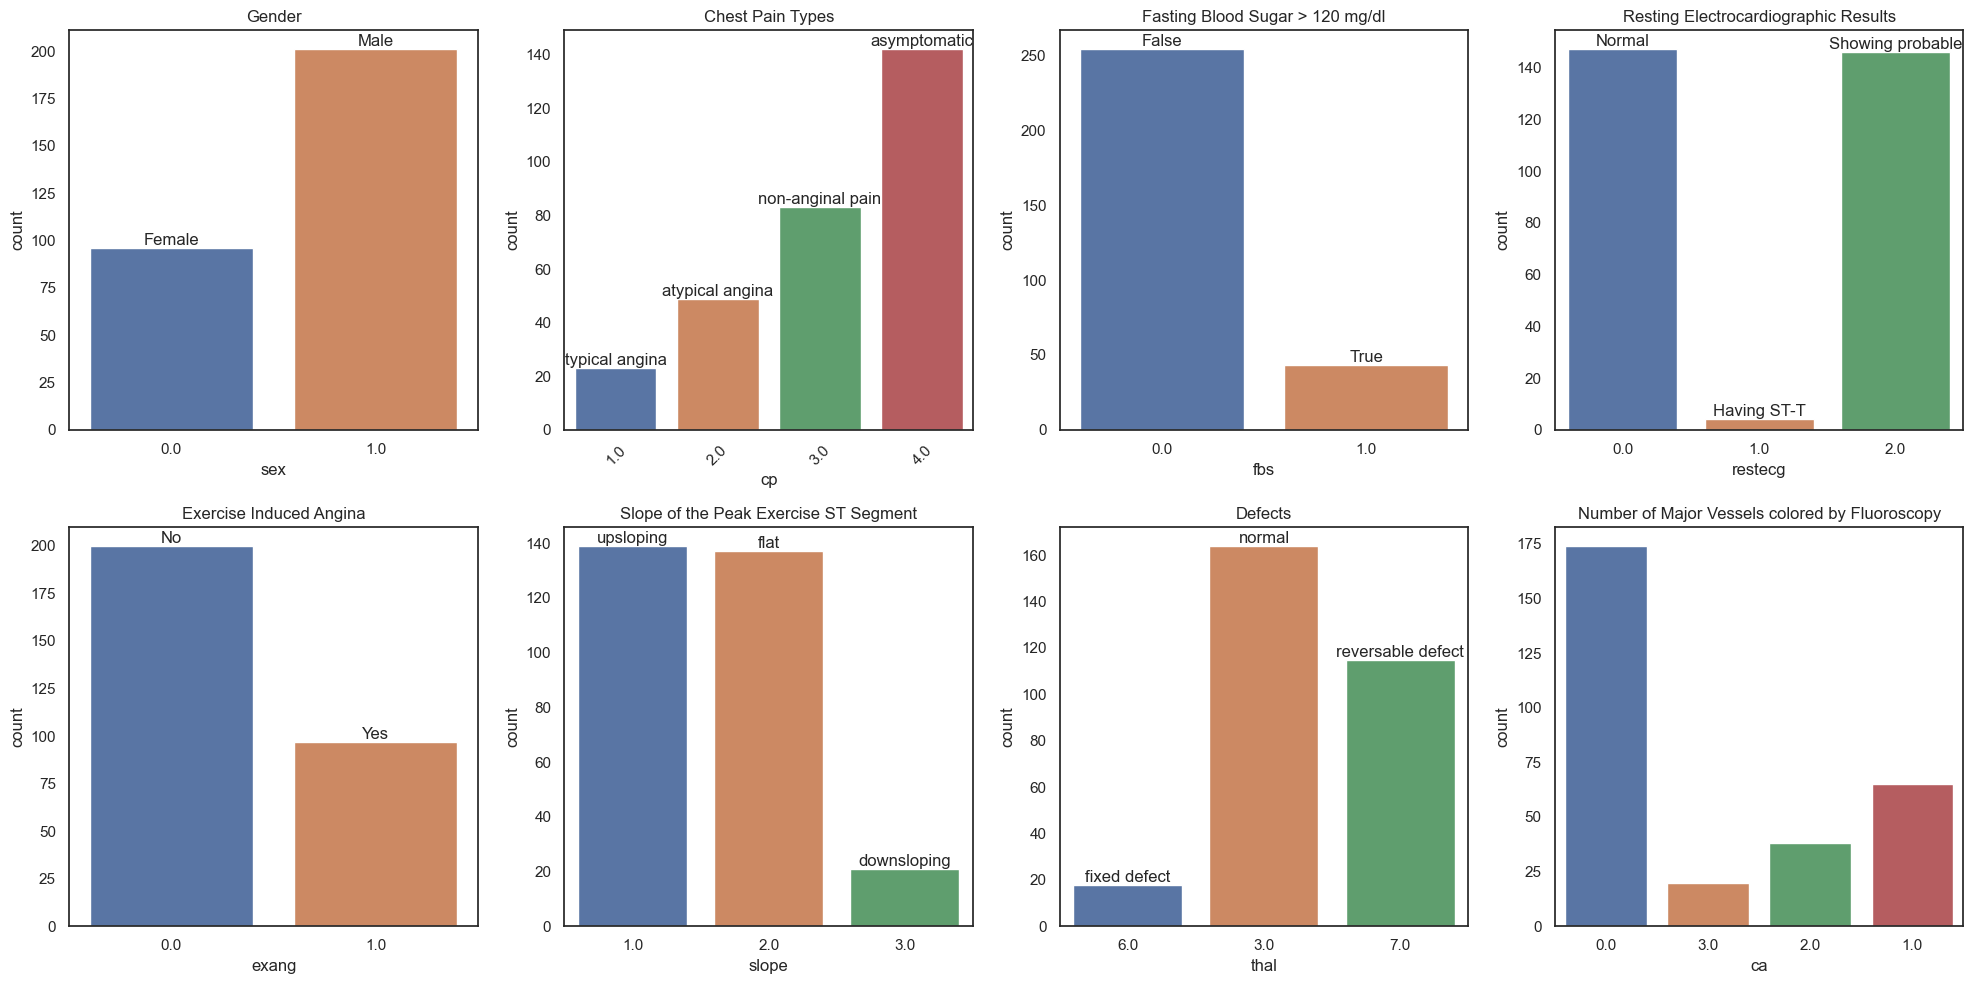

In [413]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))

ax = sns.countplot(x='sex', data=C_DF, ax=axes[0,0])
labels=['Female', 'Male']
axes[0,0].set_title('Gender')
ax.bar_label(container=ax.containers[0], labels=labels)


ax = sns.countplot(x='cp', data=C_DF, ax=axes[0,1])
labels=['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic' ]
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')
ax.bar_label(container=ax.containers[0], labels=labels)


ax = sns.countplot(x='fbs', data=C_DF, ax=axes[0,2])
labels=['False', 'True']
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')
ax.bar_label(container=ax.containers[0], labels=labels)


ax =sns.countplot(x='restecg', data=C_DF, ax=axes[0,3])
labels=['Normal', 'Having ST-T' , 'Showing probable' ]
ax.bar_label(container=ax.containers[0], labels=labels)
axes[0,3].set_title('Resting Electrocardiographic Results')

ax =sns.countplot(x='exang', data=C_DF, ax=axes[1,0])
labels=['No', 'Yes']
ax.bar_label(container=ax.containers[0], labels=labels)
axes[1,0].set_title('Exercise Induced Angina')

ax =sns.countplot(x='slope', data=C_DF, ax=axes[1,1])
labels=['upsloping', 'flat' , 'downsloping']
ax.bar_label(container=ax.containers[0], labels=labels)
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

ax =sns.countplot(x='thal', data=C_DF, ax=axes[1,2])
labels=['fixed defect', 'normal' , 'reversable defect']
ax.bar_label(container=ax.containers[0], labels=labels)
axes[1,2].set_title('Defects')

ax =sns.countplot(x='ca', data=C_DF, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')


plt.tight_layout()
plt.show()

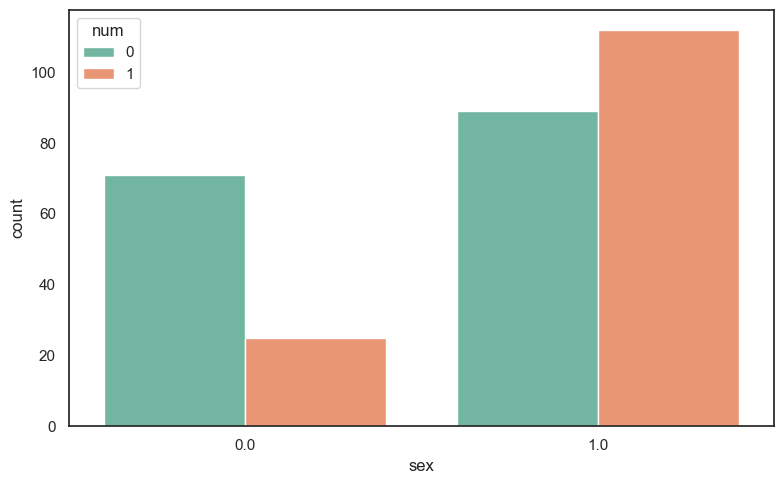

In [414]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='sex', hue='num', data=DF_1, palette='Set2')
plt.tight_layout()

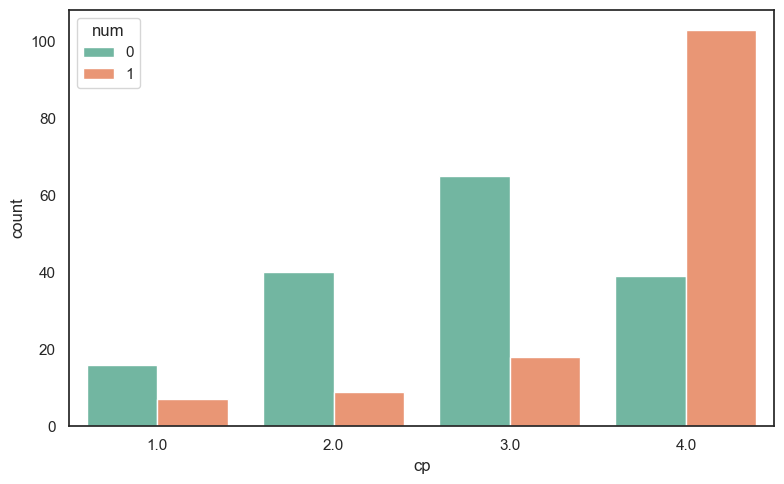

In [374]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='cp', hue='num', data=DF_1, palette='Set2')
plt.tight_layout()

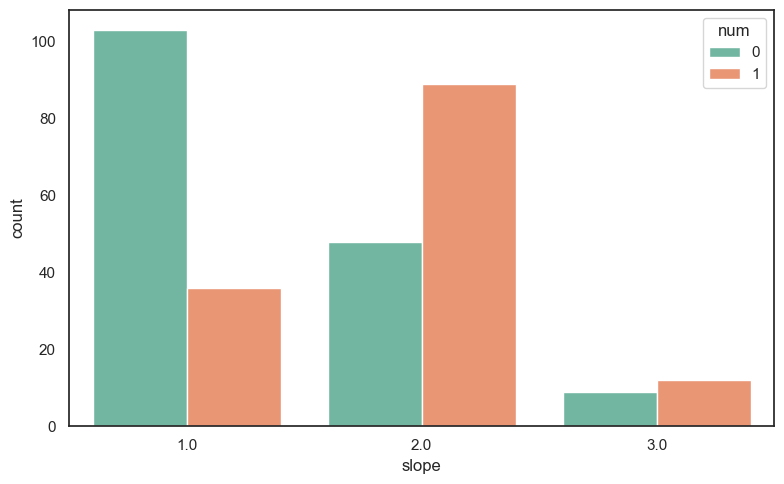

In [376]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='slope', hue='num', data=DF_1, palette='Set2')
plt.tight_layout()

In [415]:
fig = px.box(DF_1, x='num', y='age')
fig.show()

In [416]:
fig = px.box(DF_1, x='num', y='trestbps')
fig.show()

In [417]:
fig = px.box(DF_1, x='num', y='chol')
fig.show()

In [421]:
fig = px.box(DF_1, x='num', y='thalach')
fig.show()

In [419]:
fig = px.box(DF_1, x='num', y='oldpeak')
fig.show()

In [422]:

continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(DF_1[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [425]:
#Drop the Outliers 

outliers(DF_1[continous_features], drop= True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [426]:
fig = graphObject.Figure()
fig.add_trace(graphObject.Box(y=DF_1['age'].values , name='Age', marker_color = 'green',boxmean=True))
fig.add_trace(graphObject.Box(y=DF_1[DF_1['sex']=='Male']['age'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(graphObject.Box(y=DF_1[DF_1['sex']=='Female']['age'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'Age', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [343]:
group_labels = ['Age Distribution'] # name of the dataset
fig = figureFactory.create_distplot([DF_1.age], group_labels)
fig.update_layout( yaxis_title = 'propotion', xaxis_title = 'Age', title_x = 0.5)
fig.show()

In [344]:
df=DF_1['cp'].value_counts().reset_index().rename(columns={'index':'cp','cp':'count'})
fig = graphObject.Figure([graphObject.Pie(labels=df['cp'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Chest Pain Conditions",title_x=0.5)
fig.show()

<Axes: title={'center': 'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Level'>

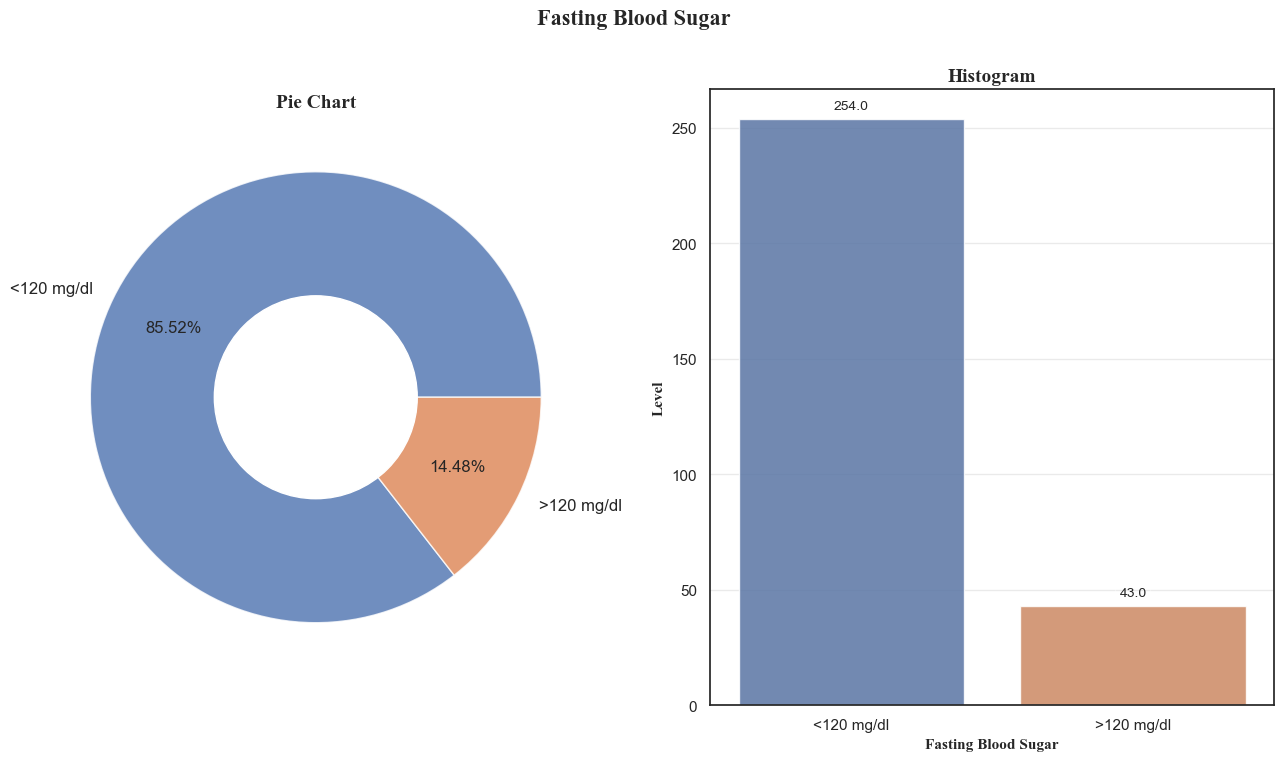

In [345]:

labels=['<120 mg/dl', '>120 mg/dl']
order=DF_1['fbs'].value_counts().index


plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar', fontweight='heavy',       fontsize='16', fontfamily='times new roman')


plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,    fontfamily='times new roman')
plt.pie(DF_1['fbs'].value_counts(), labels=labels, pctdistance=0.7, autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,       fontfamily='times new roman')
ax = sns.countplot(x='fbs', data=DF_1, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none' , linewidth=0.25, boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, fontfamily='times new roman')
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt



<Axes: title={'center': 'Histogram'}, xlabel='Chest pain type', ylabel='Level'>

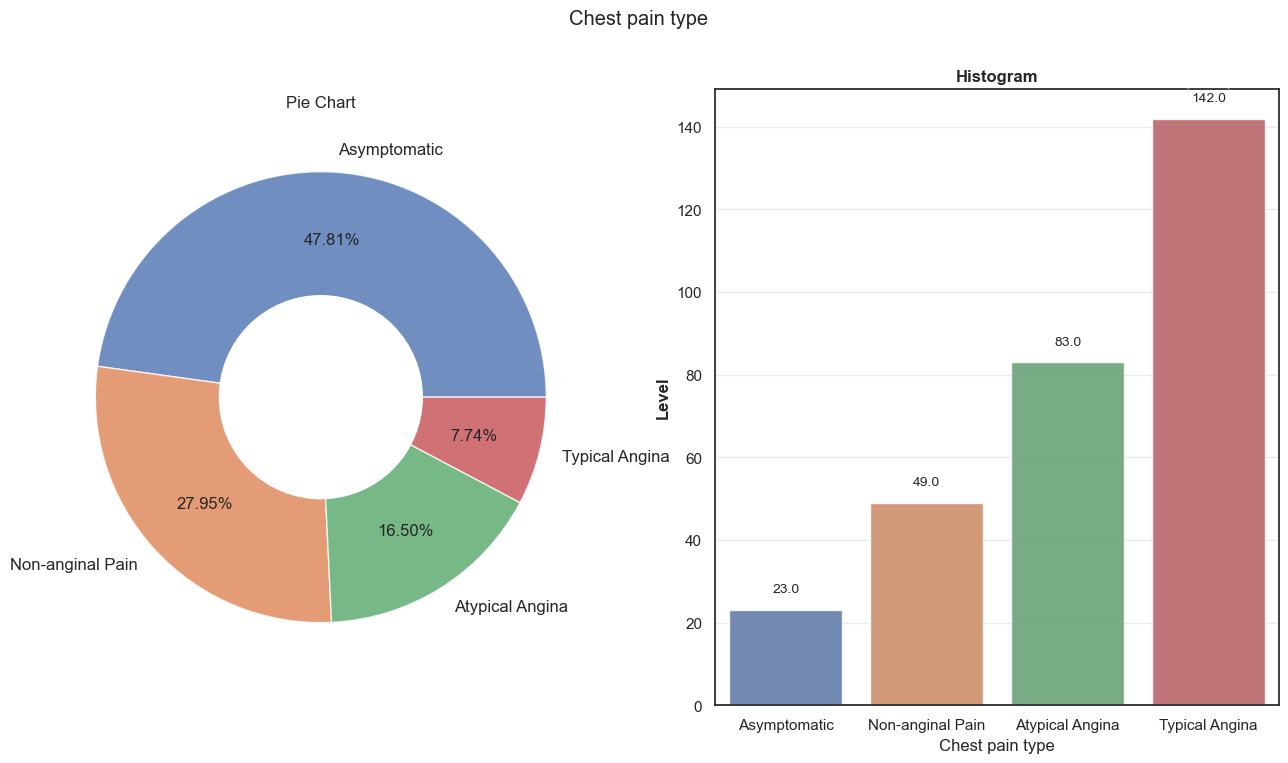

In [346]:

labels=['Asymptomatic', 'Non-anginal Pain', 'Atypical Angina', 'Typical Angina']
order=df['cp'].value_counts().index


plt.figure(figsize=(16, 8))
plt.suptitle('Chest pain type')


plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(DF_1['cp'].value_counts(), labels=labels, pctdistance=0.7,     autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold')
ax = sns.countplot(x='cp', data=DF_1,  alpha=0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none',   linewidth=0.25, boxstyle='round'))

plt.xlabel('Chest pain type')
plt.ylabel('Level', fontweight='bold')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt



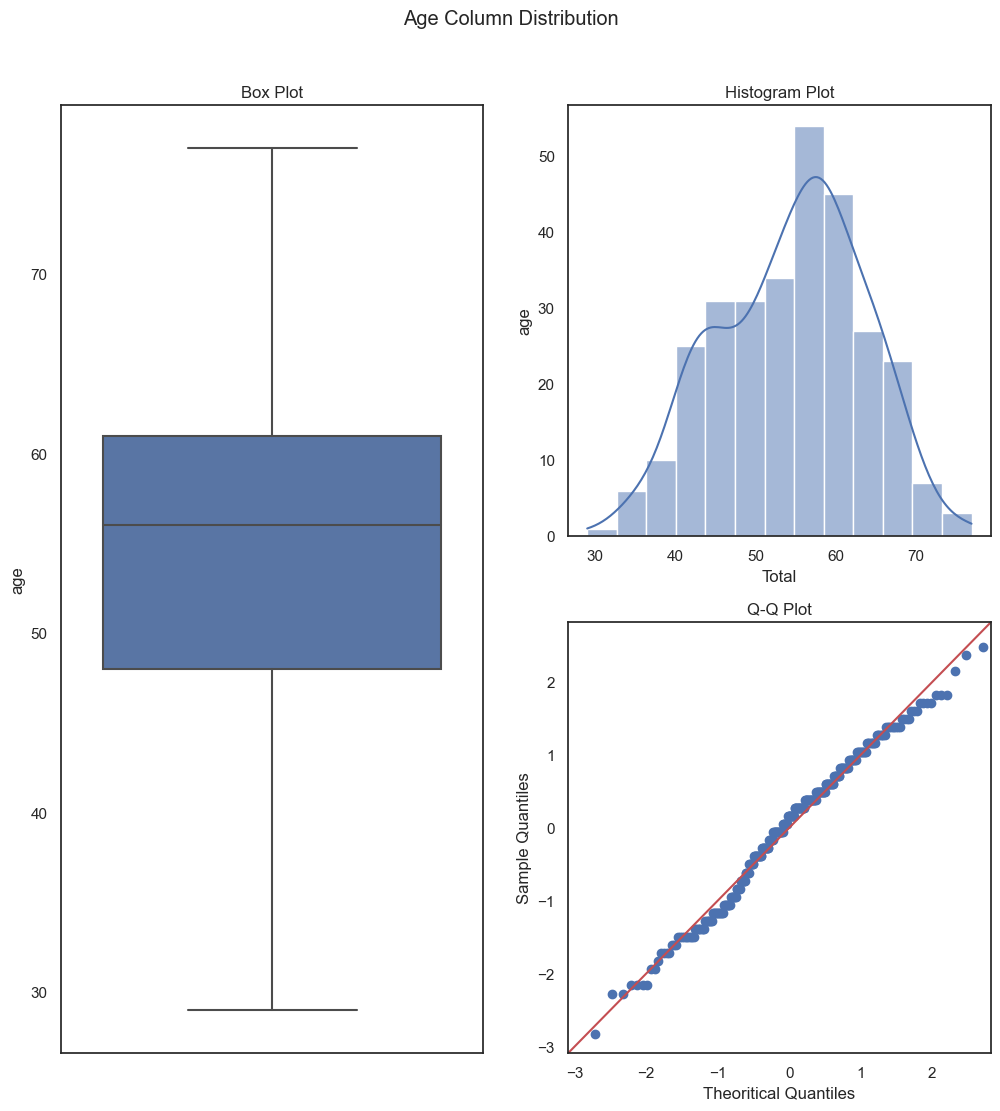

In [347]:
fig=plt.figure(figsize=(12, 12))

var = 'age'
fig.suptitle('Age Column Distribution')
fig.subplots_adjust(top=0.9)


ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot')
sns.histplot(data=DF_1, x=var, kde=True)
plt.xlabel('Total')
plt.ylabel('age')


ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot')
qqplot(DF_1[var], fit=True, line='45', ax=ax_2)
plt.xlabel('Theoritical Quantiles')
plt.ylabel('Sample Quantiles')

ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot')
sns.boxplot(data=DF_1, y=var)
plt.ylabel('age')
plt.show()

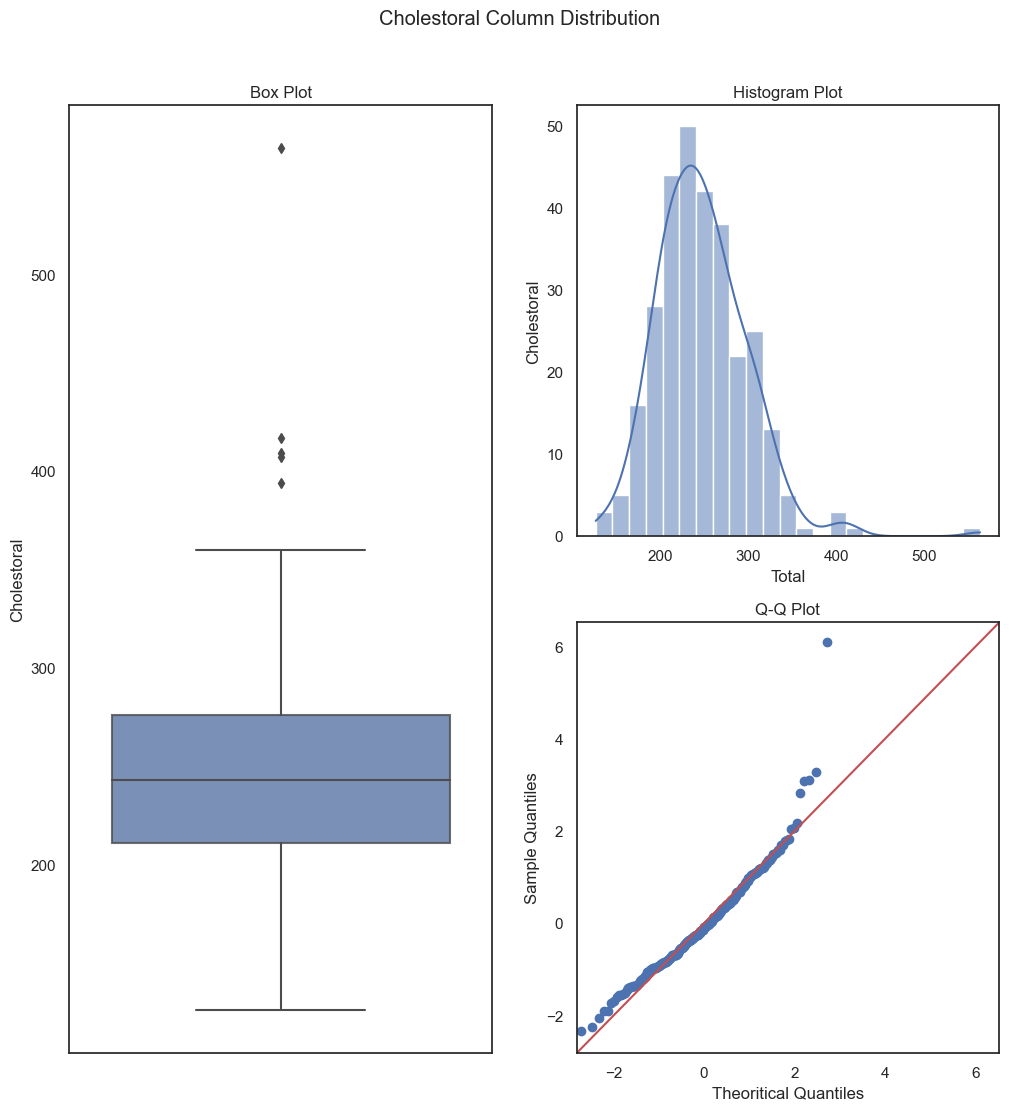

In [348]:
fig=plt.figure(figsize=(12, 12))
var = 'chol'


fig.suptitle('Cholestoral Column Distribution')
fig.subplots_adjust(top=0.9)


ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot')
sns.histplot(data=DF_1, x=var, kde=True)
plt.xlabel('Total')
plt.ylabel('Cholestoral')


ax_2=fig.add_subplot(2, 2, 4)

plt.title('Q-Q Plot')
qqplot(DF_1[var], fit=True, line='45', ax=ax_2)
plt.xlabel('Theoritical Quantiles')
plt.ylabel('Sample Quantiles')


ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot',)
sns.boxplot(data=DF_1, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Cholestoral')

plt.show()

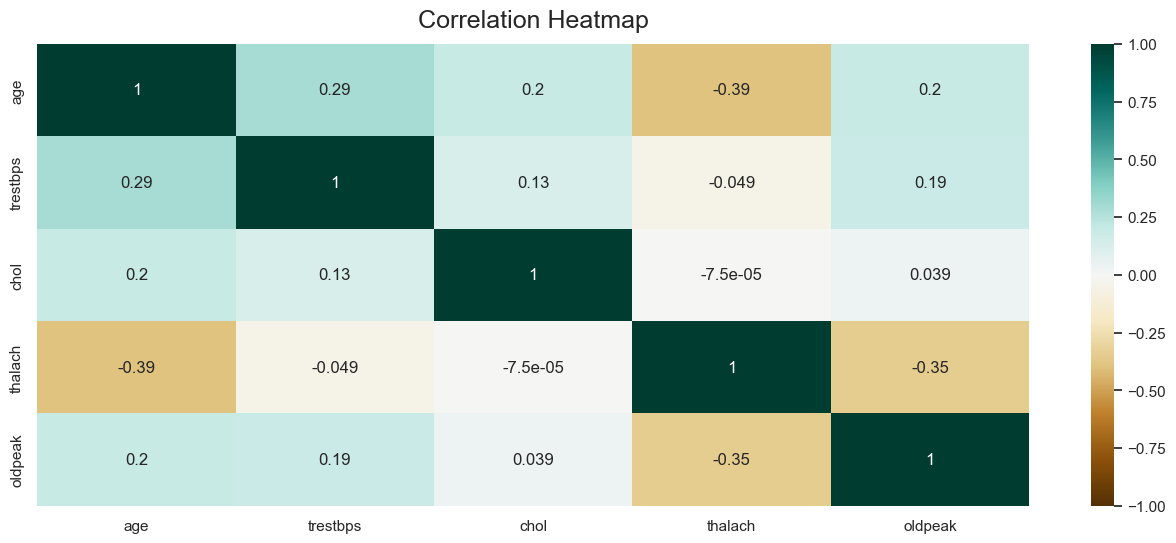

In [349]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(N_DF.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


C:\Users\sajiths\AppData\Local\Temp\ipykernel_28432\1734223877.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



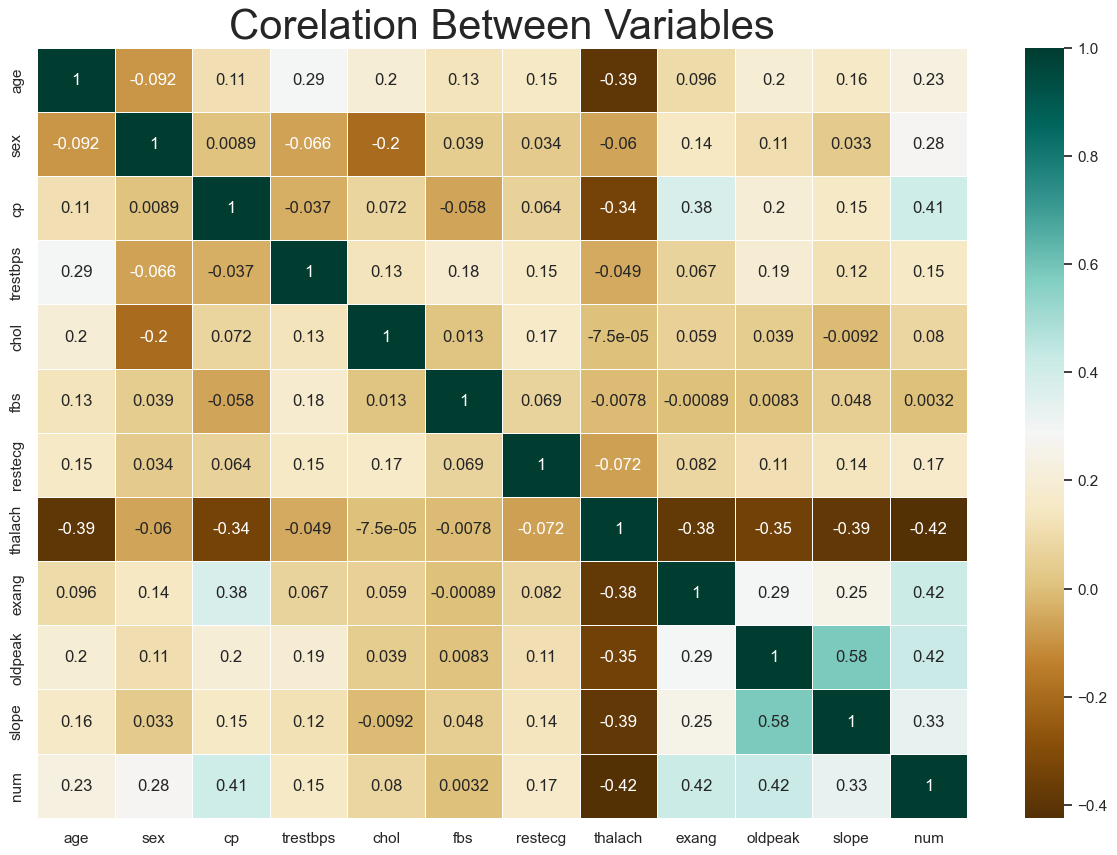

In [350]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(DF_1.corr(), annot = True, linewidths=.5, cmap="BrBG")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

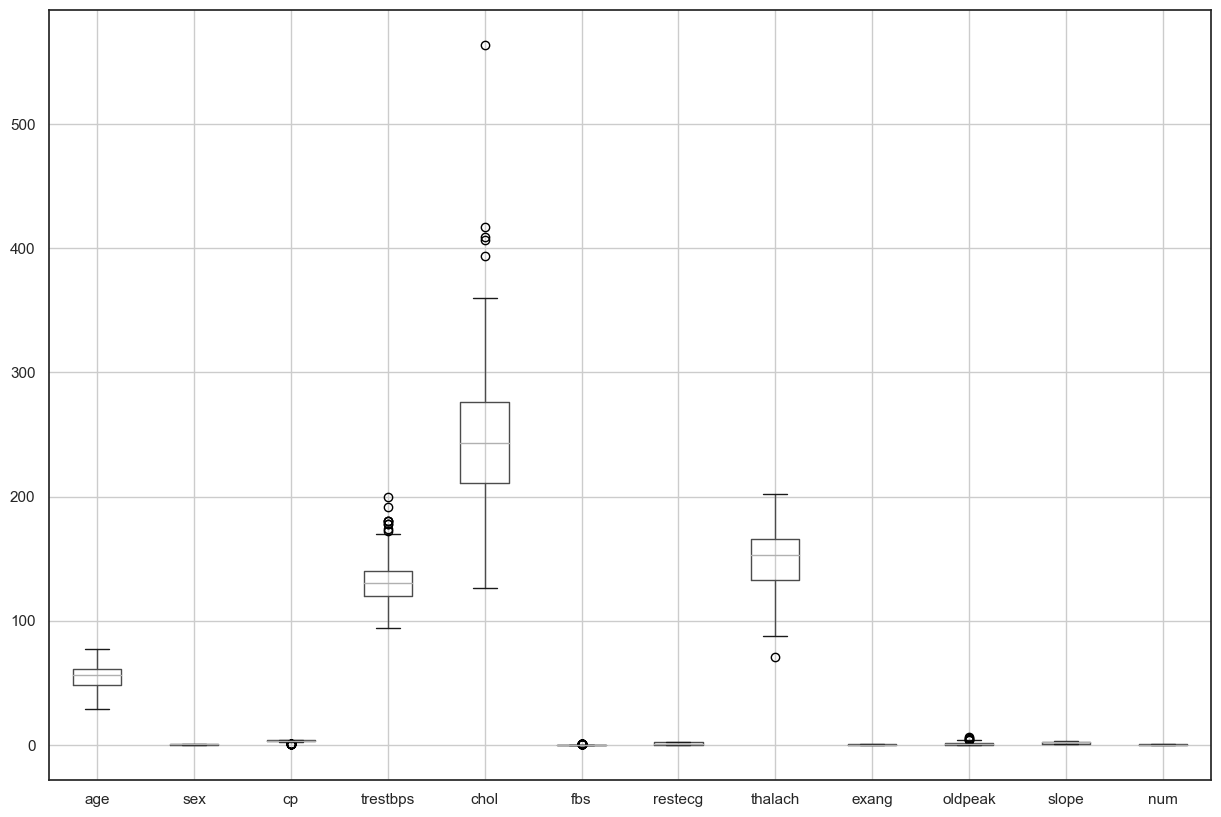

In [351]:
# Display boxplot to visualize outliers in the data

DF_1.boxplot()
plt.show()

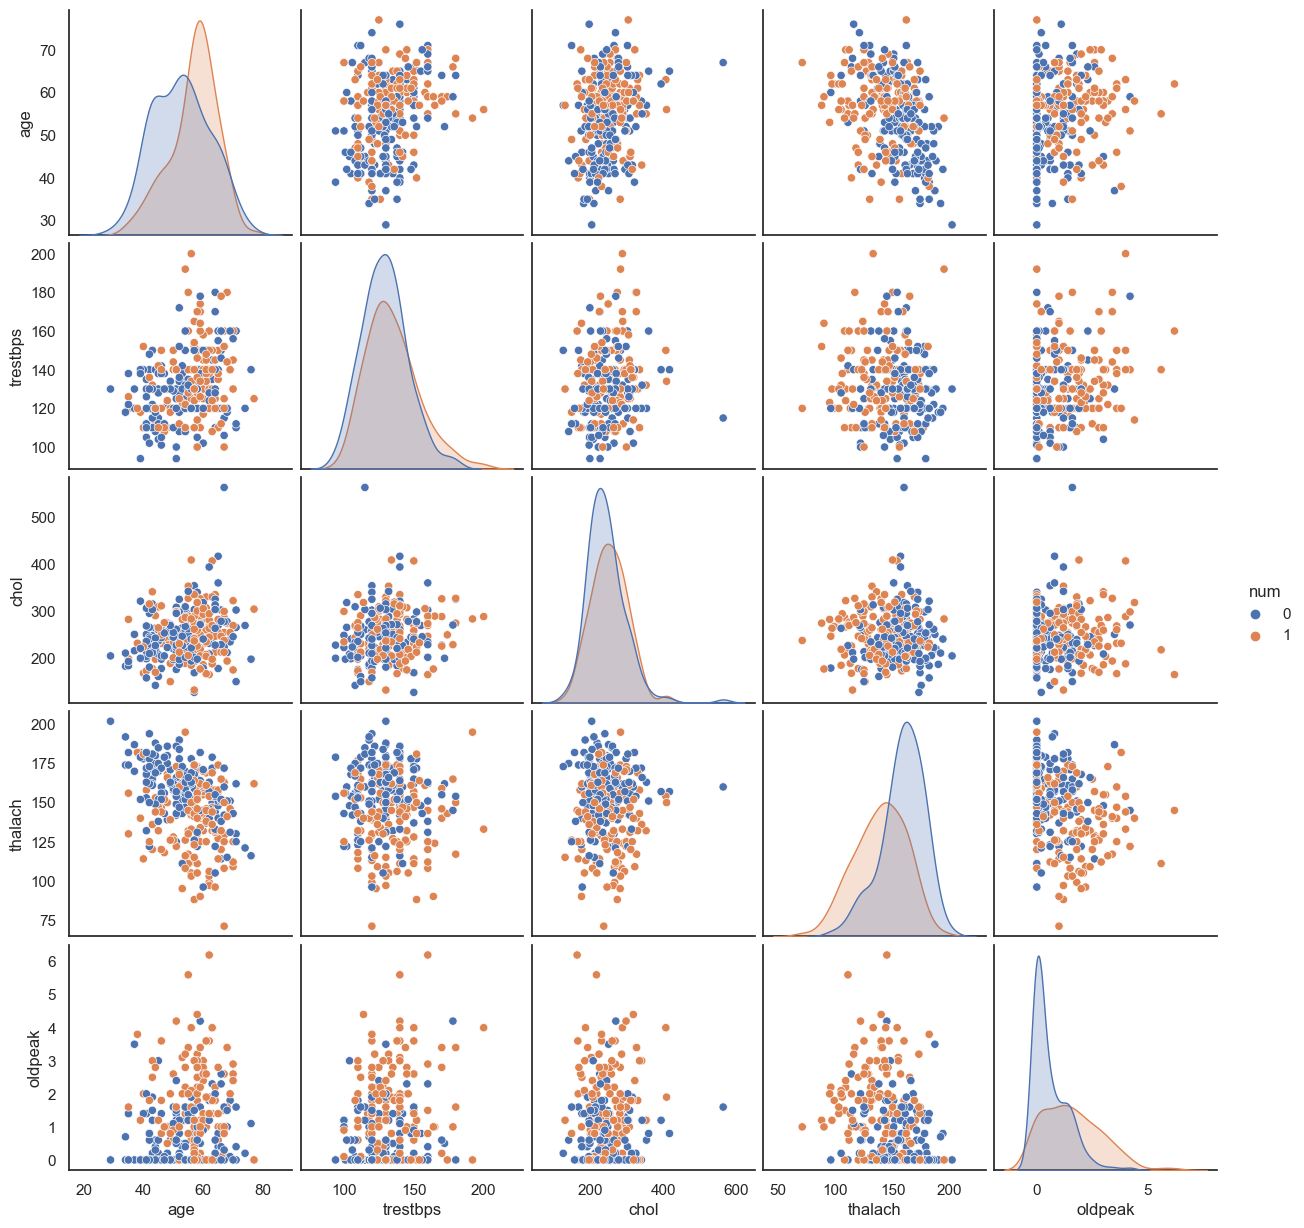

In [352]:
sns.pairplot(data=DF_1, vars=  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue="num" )


In [353]:
DF_1.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [354]:
DF_1['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
DF_1['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = DF_1[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((DF_1['num'] > 0)*1).copy()
data_tmp['sex'] = (DF_1['sex'] == 1)*1
data_tmp['fbs'] = (DF_1['fbs'])*1
data_tmp['exang'] = (DF_1['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63.0,1,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1,4.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1,4.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1,3.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0,2.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1,2.0,120.0,236.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0,4.0,140.0,268.0,0.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0,4.0,120.0,354.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1,4.0,130.0,254.0,0.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1,4.0,140.0,203.0,1.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [355]:
data = pd.get_dummies(data_tmp, drop_first=False)
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'target',
       'num_major_vessels_0.0', 'num_major_vessels_1.0',
       'num_major_vessels_2.0', 'num_major_vessels_3.0',
       'thalassemia_type_3.0', 'thalassemia_type_6.0', 'thalassemia_type_7.0'],
      dtype='object')

In [356]:

y = data['target']
X = data.drop('target', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (237, 17)
Shape of y_train: (237,)
Shape of X_test: (60, 17)
Shape of y_test: (60,)


In [357]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

C:\Users\sajiths\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

C:\Users\sajiths\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

C:\Users\sajiths\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

C:\Users\sajiths\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a s

In [358]:
X_test

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels_0.0,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,thalassemia_type_3.0,thalassemia_type_6.0,thalassemia_type_7.0
112,0.404762,1.0,0.000000,0.363636,0.212014,0.0,1.000000,0.0,0.000000,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
151,0.166667,0.0,1.000000,0.121212,0.491166,0.0,0.284211,0.0,0.107143,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12,0.500000,1.0,0.666667,0.545455,0.459364,1.0,0.494737,1.0,0.107143,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
219,0.571429,1.0,1.000000,0.666667,0.512367,0.0,0.915789,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
140,0.571429,1.0,0.333333,0.696970,0.335689,0.0,0.726316,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
74,0.214286,1.0,1.000000,0.242424,0.250883,0.0,0.863158,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
211,0.071429,1.0,0.000000,0.393939,0.371025,0.0,0.915789,1.0,0.678571,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
173,0.642857,0.0,1.000000,0.696970,0.946996,0.0,0.652632,0.0,0.214286,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0
189,0.809524,1.0,0.666667,0.696970,0.452297,0.0,0.536842,0.0,0.357143,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0
217,0.261905,0.0,1.000000,0.666667,0.413428,0.0,0.600000,1.0,0.000000,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [359]:

logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [328]:
logre = LogisticRegression()
logre.fit(X_train,y_train)

y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
    actual.append(i)
    predcition.append(j)
    
dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)

 
fig = graphObject.Figure()
fig.add_trace(graphObject.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(graphObject.Scatter(x=np.arange(0,len(y_test)), y=y_pred,  mode='markers',  name='Pred'))

In [360]:

print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))

The Accuracy Score is:  0.8166666666666667
